# Różnicowanie

In [1]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from pandas import Series
import matplotlib.pyplot as plt

Dlaczego różnicujemy szeregi czasowych?

Różnicowanie to metoda przekształcania szeregów czasowych.
Może być użyty do usunięcia zależności czasowych, takie jak trendy i sezonowość.

Różnicowanie odbywa się przez odjęcie poprzedniej obserwacji od obecnej obserwacji.

Różnica (t) = obserwacja (t) - obserwacja (t-1)


# Zadanie 
Wczytaj dane.

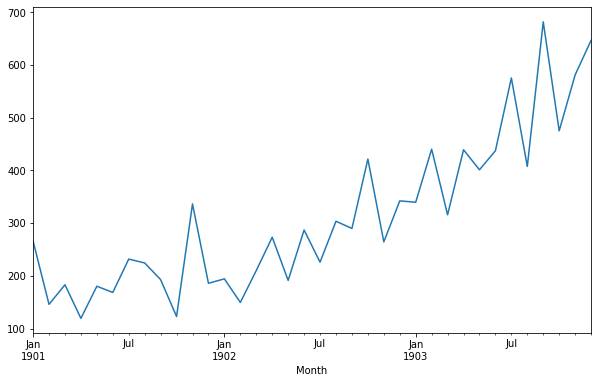

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('data/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
_, pval, _, _, _, _ = adfuller(series, autolag='AIC')
pval

1.0

# Zadanie 
Wykonaj różnicowanie za pomocą włsnej funkcji.

In [5]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

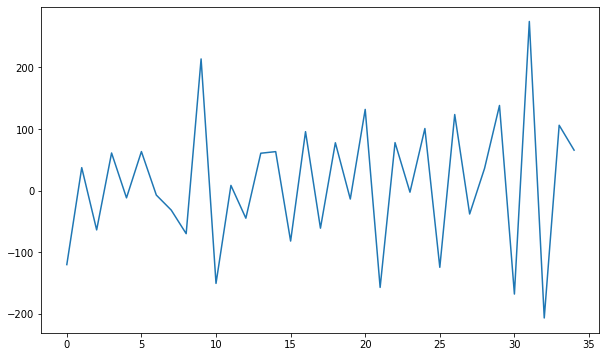

In [6]:
X = series.values
diff = difference(X)

plt.figure(figsize=(10,6));
plt.plot(diff)
plt.show()

In [7]:
_, pval, _, _, _, _ = adfuller(diff, autolag='AIC')
pval

1.7998574141687034e-10

# Zadanie 
Wykonaj różnicowanie za pomocą wbudowanej funkcji <tt>.diff()</tt>.

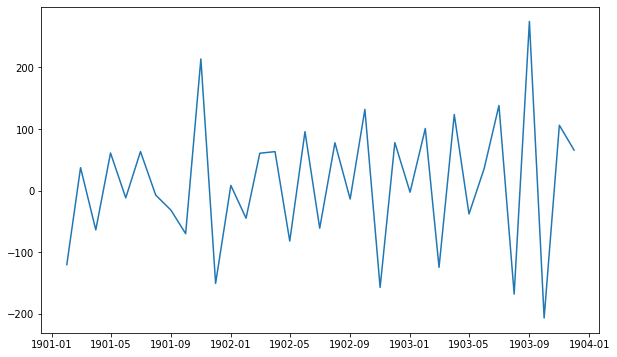

In [9]:
plt.figure(figsize=(10,6));
diff1 = series.diff()
plt.plot(diff1)
plt.show()

# Zadanie 
Wygeneruj jedną realizację "random walk" i wykonaj różnicowanie.

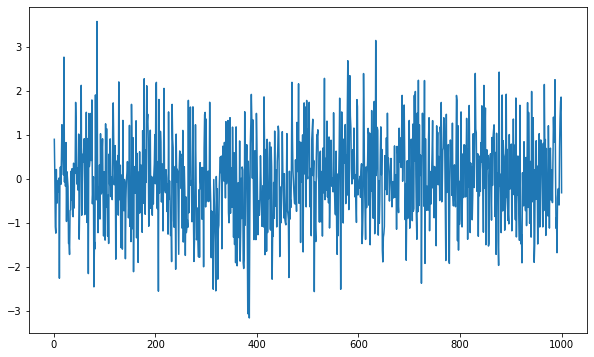

In [12]:
from random import seed
from random import random
import numpy as np
rho=1
x = [0]
for j in range(1000):
    x.append(rho*x[j] + np.random.normal())

plt.figure(figsize=(10,6));
diff2 = pd.DataFrame(x).diff()
plt.plot(diff2)
plt.show()

In [17]:
_, pval, _, _, _, _ = adfuller(diff2[1:], autolag='AIC')
pval

0.0